# Problem Statement
You've already gotten started by prepping the FBI:UCR Crime dataset (Thinkful mirror) in a previous assignment.
<br>Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

import warnings
warnings.filterwarnings("ignore")

In [2]:
def evaluate_model(X,Y):
    prop_crime_lg_model = linear_model.LinearRegression()
    prop_crime_lg_model.fit(X,Y)
    prop_crime_predicted = prop_crime_lg_model.predict(X).ravel().reshape(-1,1)
    prop_crime_residual = Y.reshape(-1,1) - prop_crime_predicted
    print ("R2 score: {}".format(prop_crime_lg_model.score(X,Y)))
    _,ax = plt.subplots(1,2, figsize = (15,3))
    ax[0].scatter(prop_crime_predicted, prop_crime_residual)
    ax[0].axhline(0, linestyle = '--', color = 'k')
    ax[0].set_title('Baseline Residual vs Predicted')
    sns.distplot(prop_crime_residual, ax = ax[1])
    ax[1].set_title('Baseline Residual Histogram')
    plt.show()

In [3]:
data = pd.read_csv('data/property_crime_new_york_prep.csv', index_col = 0)
display(data.head())

,city,population,murder,robbery,property_crime,population_squared
0,Adams Village,1861.0,0,0,12.0,3.463321e+06
1,Addison Town and Village,2577.0,0,0,24.0,6.640929e+06
2,Akron Village,2846.0,0,0,16.0,8.099716e+06
3,Albany,57559.0,1,1,1391.0,3.313038e+09
4,Albion Village,6388.0,0,1,223.0,4.080654e+07


### Baseline model (2.4.2)

R2 score: 0.8235364000008717


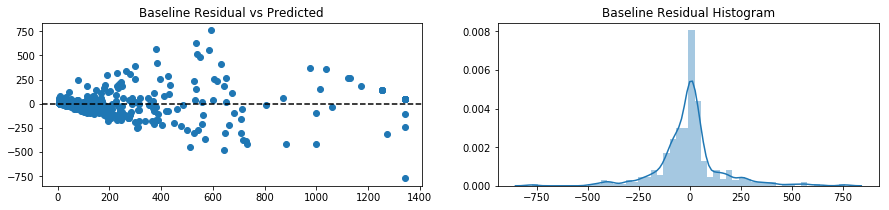

In [4]:
# get our X and Y from the data
X = data[['population', 'murder', 'robbery', 'population_squared']]
Y = data['property_crime']
evaluate_model(X,Y)

### Transformed model
The Baseline model has a normal residual histogram, but does not have evenly distributed residuals as the predicted values increase. Instead, there are a lot of values near the minimum and not very many values near the maximum. Also, the residual changes throughout the predicted values, starting low, increasing around the middle and decreasing again. 
We need to engineer the features to make the residual vs oredicted plot more even.

R2 score: 0.7846203224511713


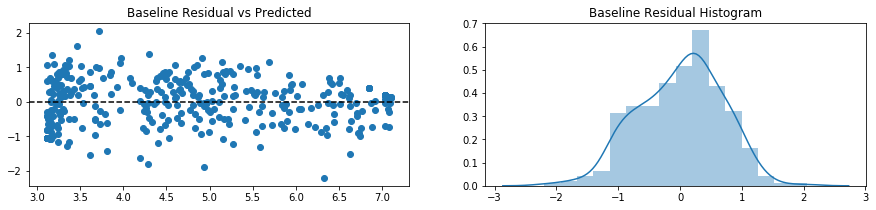

In [20]:
evaluate_model(X, Y.apply(np.log))

### Write-up
The log function helps to make the residual vs predicted plot more evenly spread out. It also maintains the normal distribution of residual values. Overall, this transformation seems like a good choice for linear regression.